<a href="https://colab.research.google.com/github/viniciusrpb/cloud_image_segmentation/blob/main/selenastraceae_keras_cnnmodels_four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

# New Section

In [2]:
#!pip install tensorflow_addons

In [3]:
#!cp -r "/content/drive/My Drive/alga/aug_roi_train_bin" "aug_roi_train_bin"
#!cp -r "/content/drive/My Drive/alga/roi_validation_bin" "roi_validation_bin"
#!cp -r "/content/drive/My Drive/alga/roi_test_bin" "roi_test_bin"
#!cp -r "/content/drive/My Drive/alga/roi_train_bin" "roi_train_bin"

#!cp -r "/content/drive/My Drive/alga/aug_roi_train" "aug_roi_train"
#!cp -r "/content/drive/My Drive/alga/roi_validation" "roi_validation"
#!cp -r "/content/drive/My Drive/alga/roi_test" "roi_test"
#!cp -r "/content/drive/My Drive/alga/roi_train" "roi_train"

#!cp -r "/content/drive/My Drive/alga/aug_roi_train" "aug_roi_train"
#!cp -r "/content/drive/My Drive/alga/roi_validation_four" "roi_validation_four"
#!cp -r "/content/drive/My Drive/alga/roi_test_four" "roi_test_four"
#!cp -r "/content/drive/My Drive/alga/roi_train_four" "roi_train_four"

In [4]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,GlobalAveragePooling2D ,MaxPooling2D,Activation,Flatten,Conv2D,BatchNormalization,Dropout
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import tensorflow_addons as tfa

In [5]:
path_train = 'roi_train_four'
path_validation = 'roi_validation_four'
path_test = 'roi_test_four'

# Pretrained GoogLeNet model using ImageNet


In [6]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape=(224,224,3),include_top=False,weights='imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False

Hyperparameters

In [7]:
batch_size = 8
epochs=30

### Data augmentation

In [8]:
train_datagen = ImageDataGenerator(rescale=1. / 255)

validation_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255)

Read the images

In [9]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(path_train,
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical', 
                                                    target_size = (224, 224))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  validation_datagen.flow_from_directory( path_validation,
                                                          batch_size  = batch_size,
                                                          class_mode  = 'categorical', 
                                                          target_size = (224, 224))

test_generator =  test_datagen.flow_from_directory( path_test,
                                                          batch_size  = batch_size,
                                                          class_mode  = 'categorical', 
                                                          target_size = (224, 224))

Found 103 images belonging to 4 classes.
Found 22 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


Hyper-parameters

In [10]:
number_of_neurons = 200
number_of_classes = validation_generator.class_indices

Lets see some samples

In [11]:
model = Sequential()

model.add(pre_trained_model)

model.add(GlobalAveragePooling2D())
model.add(Flatten())
#model.add(BatchNormalization())

# 1st hidden layer: 300 neurons
#model.add(Dense(number_of_neurons,activation="relu"))
#model.add(Dropout(0.2))

# 2nd hidden layer : 150 neurons
model.add(Dense(number_of_neurons,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 3rd hidden layer : 75 neurons
#model.add(Dense(number_of_neurons//2,activation="relu"))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Dense(4,activation="softmax"))

In [12]:
#sgd = SGD(learning_rate=0.001,decay=1e-6,  nesterov=True)

f1_score = tfa.metrics.F1Score(num_classes=4, average='macro',threshold=0.5)

#model.compile(optimizer = sgd, 
#              loss = 'categorical_crossentropy', 
#              metrics = 'accuracy')
            #metrics = ['accuracy',f1_score])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005,decay=0.01), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy',f1_score])
            #metrics = ['accuracy',f1_score])

In [13]:
history_fine = model.fit(train_generator,
                         epochs=epochs,
                         validation_data=validation_generator
                         #initial_epoch=history.epoch[-1],
                         )

Epoch 1/30
13/13 [==============================] - 20s 389ms/step - loss: 1.0782 - accuracy: 0.5631 - f1_score: 0.4627 - val_loss: 0.6684 - val_accuracy: 0.7727 - val_f1_score: 0.6228
Epoch 2/30
13/13 [==============================] - 1s 92ms/step - loss: 0.3969 - accuracy: 0.8350 - f1_score: 0.8318 - val_loss: 0.7272 - val_accuracy: 0.9091 - val_f1_score: 0.8429
Epoch 3/30
13/13 [==============================] - 1s 93ms/step - loss: 0.2121 - accuracy: 0.9612 - f1_score: 0.9497 - val_loss: 0.7328 - val_accuracy: 0.8636 - val_f1_score: 0.7833
Epoch 4/30
13/13 [==============================] - 1s 93ms/step - loss: 0.2363 - accuracy: 0.9126 - f1_score: 0.9052 - val_loss: 0.6333 - val_accuracy: 0.9091 - val_f1_score: 0.8210
Epoch 5/30
13/13 [==============================] - 1s 92ms/step - loss: 0.2455 - accuracy: 0.9320 - f1_score: 0.9132 - val_loss: 0.6146 - val_accuracy: 0.8182 - val_f1_score: 0.7861
Epoch 6/30
13/13 [==============================] - 1s 94ms/step - loss: 0.1344 - a

In [14]:
#f1 = history_fine.history['f1_score']
#val_f1 = history_fine.history['val_f1_score']

#plt.figure(figsize=(8, 8))
#plt.subplot(2, 1, 1)
#plt.plot(f1, label='Training F1-Score')
#plt.plot(val_f1, label='Validation F1-Score')
#plt.legend(loc='lower right')
#plt.ylabel('F1-Score')
#plt.ylim([min(plt.ylim()),1])
#plt.title('Training and Validation F1-Score')


Text(0.5, 1.0, 'Training and Validation F1-Score')

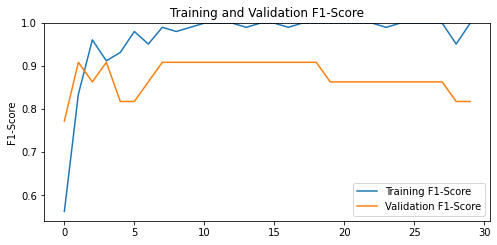

In [15]:
f1 = history_fine.history['accuracy']
val_f1 = history_fine.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(f1, label='Training F1-Score')
plt.plot(val_f1, label='Validation F1-Score')
plt.legend(loc='lower right')
plt.ylabel('F1-Score')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation F1-Score')


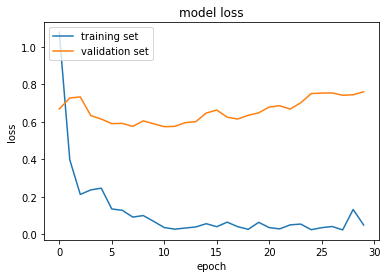

In [16]:
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper left')
plt.show()

In [17]:
score = model.evaluate(test_generator,batch_size=batch_size) 
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

7/7 [==============================] - 1s 85ms/step - loss: 0.4814 - accuracy: 0.8148 - f1_score: 0.7909
Test loss: 0.48143917322158813 / Test accuracy: 0.8148148059844971


In [18]:
#y_prob = model.predict(test_generator,batch_size=batch_size)
#y_pred = np.argmax(y_prob,axis=1)

y_prob = model.predict(test_generator)
y_pred = np.argmax(y_prob,axis=1)
#print(pred, labels[np.argmax(pred)])
print(classification_report(test_generator.classes,y_pred))

              precision    recall  f1-score   support

           0       0.33      0.29      0.31        17
           1       0.17      0.15      0.16        13
           2       0.08      0.10      0.09        10
           3       0.40      0.43      0.41        14

    accuracy                           0.26        54
   macro avg       0.25      0.24      0.24        54
weighted avg       0.26      0.26      0.26        54



In [19]:
y_prob

array([[2.90383309e-01, 6.38255417e-01, 4.86529246e-02, 2.27083359e-02],
       [7.62009760e-03, 5.96012920e-03, 1.02765083e-01, 8.83654773e-01],
       [2.88490988e-02, 9.68097568e-01, 3.05222557e-03, 1.12394571e-06],
       [7.48212857e-04, 9.97079372e-01, 2.17103097e-03, 1.42618785e-06],
       [9.84504938e-01, 1.32219987e-02, 2.25572661e-03, 1.73521712e-05],
       [7.35345840e-01, 2.40466118e-01, 2.41852459e-02, 2.79980873e-06],
       [8.17543030e-01, 7.81513937e-03, 1.17171812e-03, 1.73470080e-01],
       [1.99439183e-01, 1.44651741e-01, 5.48896372e-01, 1.07012711e-01],
       [1.45107517e-02, 8.44511524e-05, 9.23982203e-01, 6.14226237e-02],
       [5.44742972e-04, 2.36169566e-04, 4.41552431e-04, 9.98777449e-01],
       [1.77000661e-03, 6.20349369e-04, 1.25665439e-03, 9.96353030e-01],
       [4.15531278e-04, 9.92839217e-01, 6.74383808e-03, 1.33069068e-06],
       [6.80240511e-04, 7.16816518e-04, 9.98601973e-01, 9.14529039e-07],
       [5.18442333e-01, 3.33533585e-01, 1.44030824e

In [20]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [21]:
y_pred

array([1, 3, 1, 1, 0, 0, 0, 2, 2, 3, 3, 1, 2, 0, 2, 0, 1, 1, 2, 2, 0, 2,
       1, 2, 3, 2, 2, 0, 0, 3, 2, 1, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 2, 3,
       3, 3, 1, 3, 1, 1, 3, 3, 0, 1])

In [22]:
import plotly.figure_factory as ff

y_true = test_generator.classes

z = confusion_matrix(y_true, y_pred)

x = list(test_generator.class_indices.keys())

y = list(test_generator.class_indices.keys())


In [23]:
# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in z]

# set up figure 
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()